In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [3]:
torch.__version__

'2.4.0+rocm6.3.2'

In [4]:
weight = 0.7
bias= 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [5]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

In [7]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [9]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [10]:
def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training data')
    plt.scatter(test_data, test_labels, c="g", s=4, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
    plt.legend()
    plt.show()

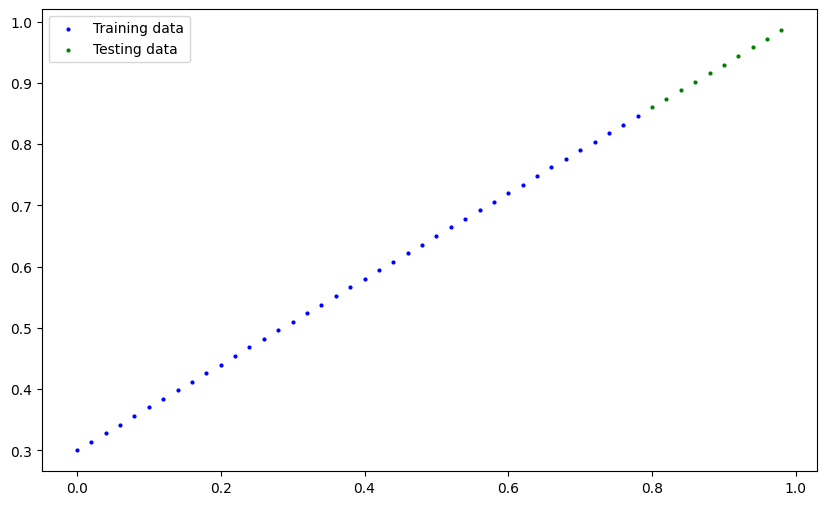

In [11]:
plot_prediction()

In [12]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [13]:
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.2038], requires_grad=True),
 Parameter containing:
 tensor([1.8120], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.2038])), ('bias', tensor([1.8120]))])

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6490],
        [1.6449],
        [1.6409],
        [1.6368],
        [1.6327],
        [1.6286],
        [1.6246],
        [1.6205],
        [1.6164],
        [1.6123]])

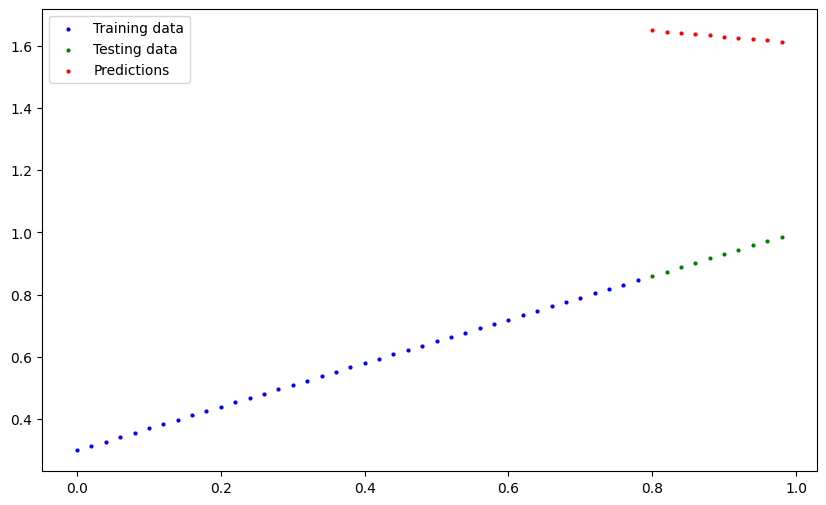

In [17]:
plot_prediction(predictions=y_preds)

In [18]:
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([-0.2038], requires_grad=True),
  Parameter containing:
  tensor([1.8120], requires_grad=True)],
 OrderedDict([('weight', tensor([-0.2038])), ('bias', tensor([1.8120]))]))

In [19]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=1e-2)


In [20]:
epochs = 1000

epochCount = []
lossValues = []
testLossValues = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 50 == 0:
        epochCount.append(epoch)
        lossValues.append(loss.item())
        testLossValues.append(test_loss.item())
        print(f"Epoch {epoch}, Loss {loss.item()}, Test Loss {test_loss.item()}\n")
        print(model_0.state_dict())

Epoch 0, Loss 1.1595609188079834, Test Loss 0.6941933631896973

OrderedDict({'weight': tensor([-0.2077]), 'bias': tensor([1.8020])})
Epoch 50, Loss 0.583511471748352, Test Loss 0.05705805867910385

OrderedDict({'weight': tensor([-0.4027]), 'bias': tensor([1.3020])})
Epoch 100, Loss 0.27555549144744873, Test Loss 0.41433343291282654

OrderedDict({'weight': tensor([-0.4948]), 'bias': tensor([0.9490])})
Epoch 150, Loss 0.2365587055683136, Test Loss 0.5003794431686401

OrderedDict({'weight': tensor([-0.4505]), 'bias': tensor([0.8235])})
Epoch 200, Loss 0.21769113838672638, Test Loss 0.4935397207736969

OrderedDict({'weight': tensor([-0.3754]), 'bias': tensor([0.7635])})
Epoch 250, Loss 0.20018057525157928, Test Loss 0.46728867292404175

OrderedDict({'weight': tensor([-0.2942]), 'bias': tensor([0.7175])})
Epoch 300, Loss 0.18300798535346985, Test Loss 0.42730069160461426

OrderedDict({'weight': tensor([-0.2088]), 'bias': tensor([0.6815])})
Epoch 350, Loss 0.16583251953125, Test Loss 0.38731

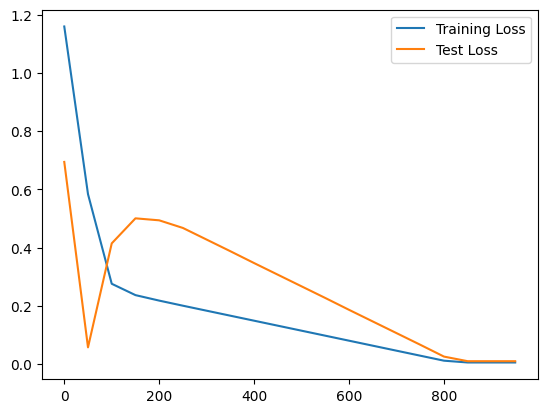

In [21]:
plt.plot(epochCount, lossValues, label='Training Loss')
plt.plot(epochCount, testLossValues, label='Test Loss')
plt.legend()
plt.show()

In [22]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

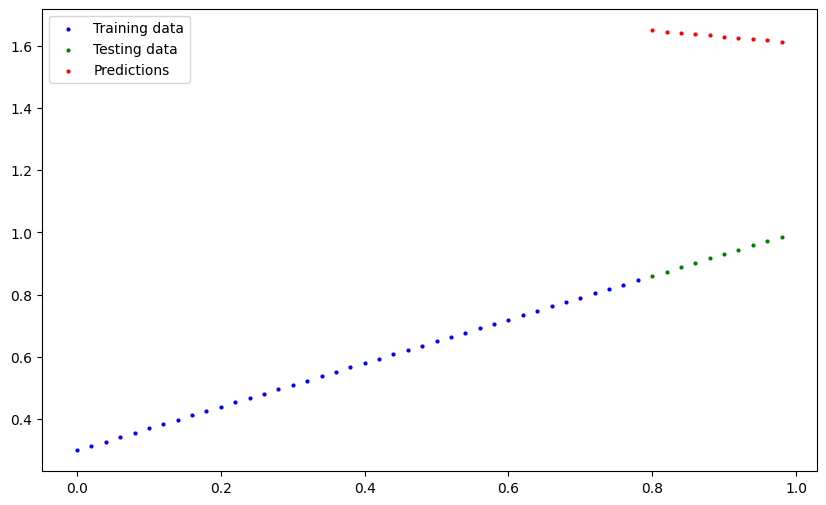

In [23]:
plot_prediction(predictions=y_preds)


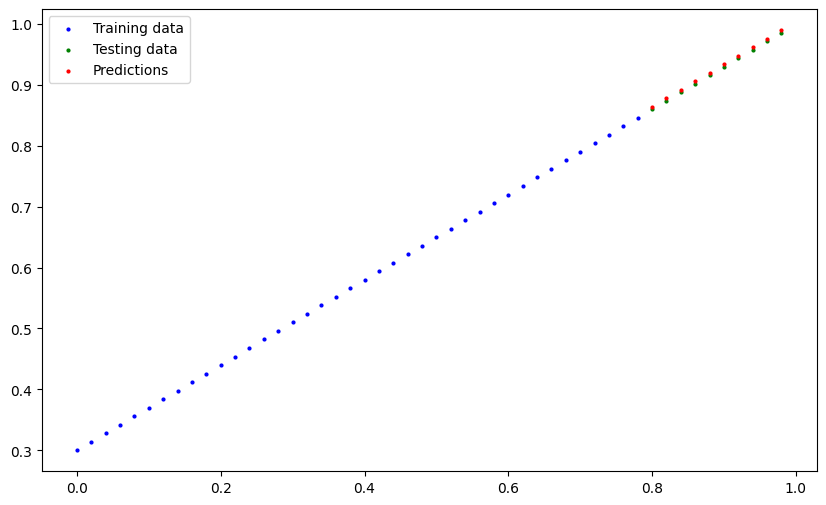

In [24]:
plot_prediction(predictions=y_preds_new)


In [25]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

modelName = "learingPythonYt.pth"
modelSavePath = model_path / modelName

torch.save(model_0.state_dict(), modelSavePath)

In [26]:
loaded_model = LinearRegression()
print(loaded_model.state_dict())
loaded_model.load_state_dict(torch.load(modelSavePath))
print(loaded_model.state_dict())

OrderedDict({'weight': tensor([0.5022]), 'bias': tensor([-2.7626])})
OrderedDict({'weight': tensor([0.6977]), 'bias': tensor([0.3060])})


/tmp/ipykernel_839/1761138176.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(modelSavePath))
